In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import skimage
import torch
import torchvision

In [2]:
root = "/cluster/tufts/hugheslab/eharve06/MNIST"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=1),
])
train_dataset = torchvision.datasets.MNIST(root=root, train=True, transform=transform, download=True)
train_labels = np.array([label for image, label in train_dataset])
train_pixels = np.array([image.reshape(1) for image, label in train_dataset])

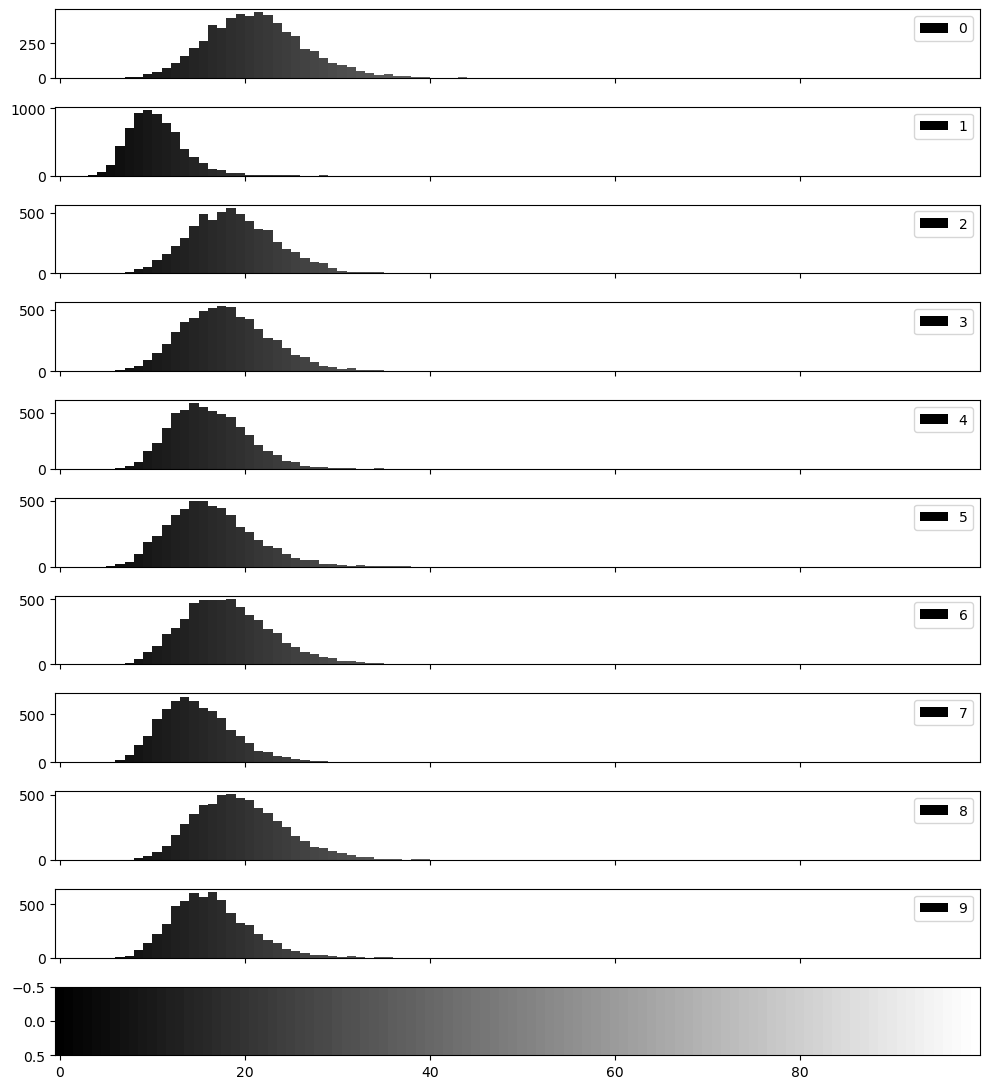

In [3]:
num_bins = 100
pixels = np.array([i for i in range(num_bins)])

labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

ncols, nrows = 1, 11

fig, axs = plt.subplots(figsize=(10*ncols, 1*nrows), ncols=ncols, nrows=nrows, sharex=True)

for i in range(10):
        
    counts, bins, patches = axs[i].hist(100 * train_pixels[train_labels==i], bins=pixels, label=f"{labels[i]}")        
    
    for patch, color in zip(patches, pixels):
        patch.set_facecolor((color / num_bins, color / num_bins, color / num_bins))
    
    legend = axs[i].legend(loc="upper right")
    
axs[10].imshow([pixels], aspect="auto", cmap="gray")

fig.tight_layout()

plt.show()


In [4]:
root = "/cluster/tufts/hugheslab/eharve06/CIFAR-10"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=1),
])
train_dataset = torchvision.datasets.CIFAR10(root=root, train=True, transform=transform, download=True)
train_labels = np.array([label for image, label in train_dataset])
train_rgbs = np.array([image.reshape(3) for image, label in train_dataset],)

Files already downloaded and verified


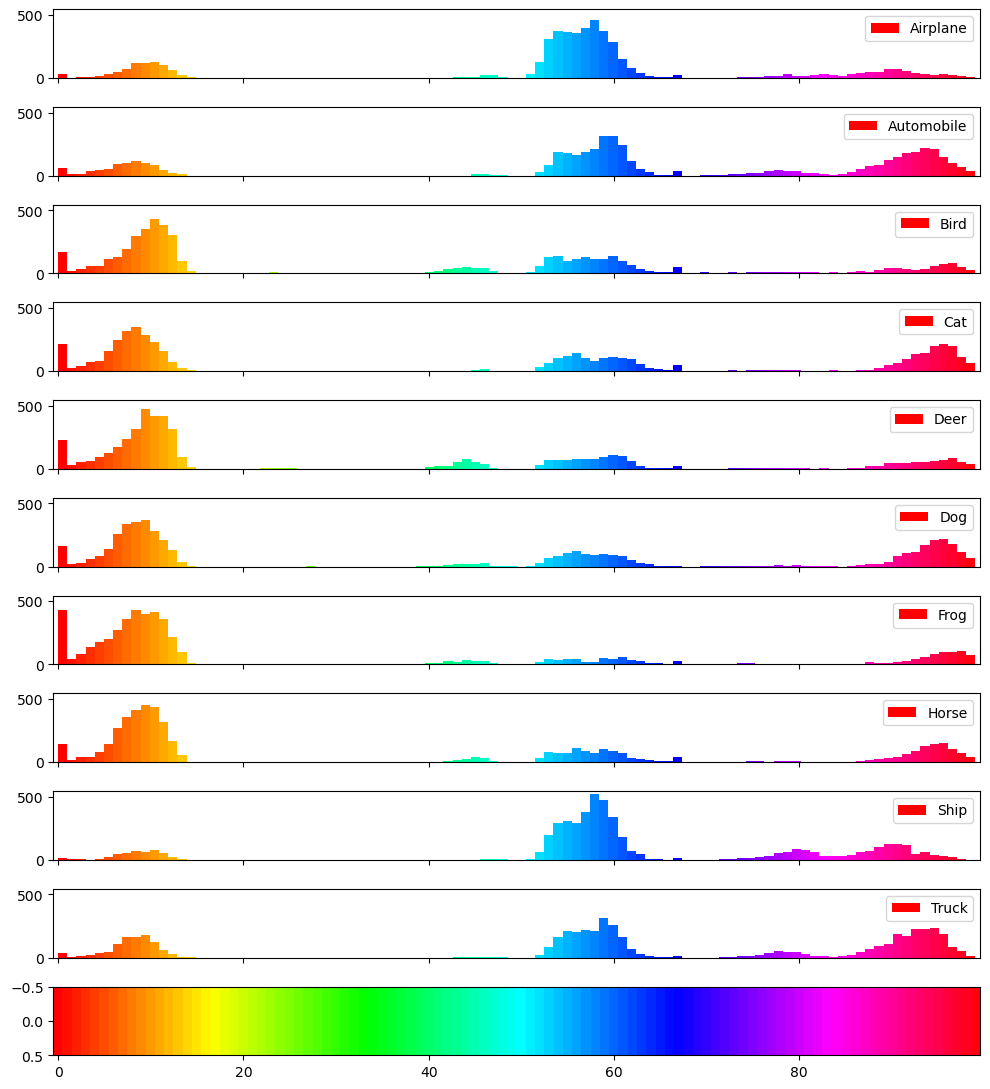

In [5]:
num_bins = 100
rgbs = np.array([colorsys.hsv_to_rgb(i/num_bins, 1.0, 1.0) for i in range(num_bins)])

dists = np.linalg.norm(train_rgbs[:, None, :] - rgbs[None, :, :], axis=2)
closest_idx = np.argmin(dists, axis=1)

train_labs = skimage.color.rgb2lab(train_rgbs)
labs = skimage.color.rgb2lab(rgbs)

dists = skimage.color.deltaE_ciede2000(train_labs[:, None, :], labs[None, :, :])
closest_idx = np.argmin(dists, axis=1)

labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF"]

ncols, nrows = 1, 11

fig, axs = plt.subplots(figsize=(10*ncols, 1*nrows), ncols=ncols, nrows=nrows, sharex=True)

for i in range(10):
        
    counts, bins, patches = axs[i].hist(closest_idx[train_labels==i], bins=num_bins, label=f"{labels[i]}")

    for patch, color in zip(patches, rgbs):
        patch.set_facecolor(color)
        
    legend = axs[i].legend(loc="upper right")

max_y2 = max([axs[i].get_ylim()[1] for i in range(10)])
for i in range(10):
    axs[i].set_ylim([0, max_y2])
    
axs[10].imshow([rgbs], aspect="auto")

fig.tight_layout()

plt.show()
